In [12]:
import pandas as pd

df = pd.read_excel('./Data/drone_data.xlsx')

print(df.head())

   Maximum Principal Elastic Strain (m/m)  Total Deformation (m)  \
0                            1.645777e-08           1.194049e-09   
1                            1.462148e-08           1.061343e-09   
2                            1.278519e-08           9.286820e-10   
3                            1.096267e-08           7.960099e-10   
4                            9.174577e-09           6.633378e-10   

   Equivalent Elastic Strain (m/m) Dimensions (mm)  
0                     2.171072e-08     400*410*100  
1                     1.929829e-08     400*410*100  
2                     1.688586e-08     400*410*100  
3                     1.447343e-08     400*410*100  
4                     1.206215e-08     400*410*100  


In [13]:
# Split the 'dimensions' column into three separate columns
df[['length', 'width', 'height']] = df['Dimensions (mm)'].str.split('*', expand=True)

# Convert the new columns to numeric values
df['length'] = pd.to_numeric(df['length'])
df['width'] = pd.to_numeric(df['width'])
df['height'] = pd.to_numeric(df['height'])

df.drop('Dimensions (mm)', axis=1, inplace=True)

df

,Maximum Principal Elastic Strain (m/m),Total Deformation (m),Equivalent Elastic Strain (m/m),length,width,height
0,1.645777e-08,1.194049e-09,2.171072e-08,400,410,100
1,1.462148e-08,1.061343e-09,1.929829e-08,400,410,100
2,1.278519e-08,9.286820e-10,1.688586e-08,400,410,100
3,1.096267e-08,7.960099e-10,1.447343e-08,400,410,100
4,9.174577e-09,6.633378e-10,1.206215e-08,400,410,100
5,7.294672e-09,5.306771e-10,9.649259e-09,400,410,100
6,5.476743e-09,3.980049e-10,7.236944e-09,400,410,100
7,3.647336e-09,2.653328e-10,4.824629e-09,400,410,100
8,1.788090e-09,1.326262e-10,2.412315e-09,400,410,100
9,2.144303e-09,1.557213e-10,2.831479e-09,400,410,100


In [14]:
import pandas as pd
import numpy as np

from skopt.space import Real, Integer
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

In [15]:
def branin(X, Y):
    a = 1.0
    b = 5.1 / (4.0 * np.pi**2)
    c = 5.0 / np.pi
    r = 6.0
    s = 10.0
    t = 1.0 / (8.0 * np.pi)
    
    return a * (Y - b * X**2 + c * X - r)**2 + s * (1 - t) * np.cos(X) + s

def currin(X, Y):
    term1 = 1 - np.exp(-1 / (2 * Y))
    term2 = (2300 * X**3 + 1900 * X**2 + 2092 * X + 60) / (100 * X**3 + 500 * X**2 + 4 * X + 20)
    
    return term1 * term2

In [16]:
ran_err = lambda n, x: np.random.normal(0, x, n)

In [17]:
# number of initial simulations
sim_n = 10

# Random Seed
r = np.random.default_rng(seed=2)

In [18]:
# xy_range = [(-10, 10)]*2

# X = np.arange(*xy_range[0], ((xy_range[0][1] - xy_range[0][0]) / 100))
# Y = np.arange(*xy_range[1], ((xy_range[1][1] - xy_range[1][0]) / 100))
# X, Y = np.meshgrid(X, Y)

# # Generate the initial simulated experiments
# df = pd.DataFrame(r.uniform(xy_range[0][0], xy_range[0][1], size=(sim_n, 2)))
# df.columns = ["x", "y"]
# df["z1"] = obj_func(df['x'], df['y']) + ran_err(sim_n, 0.05)
# df["z2"] = obj_func2(df['x'], df['y']) + ran_err(sim_n, 0.05)

In [19]:
# Generate 10 random data points for two inputs (X, Y) within specified bounds
X = np.random.uniform(-5, 10, 10)
Y = np.random.uniform(0, 15, 10)

# Calculate the outputs using Branin and Currin functions
output1 = branin(X, Y)
output2 = currin(X, Y)

# Create a pandas DataFrame
df = pd.DataFrame({
    'x': X,
    'y': Y,
    'z1': output1,
})


In [20]:
df

,x,y,z1
0,-2.499060,5.915850,26.013306
1,8.641057,8.101014,41.735086
2,9.385024,9.353607,48.180338
3,9.780517,8.949900,38.925937
4,5.676206,8.533312,72.721522
5,1.920923,11.249449,68.015359
6,3.819629,7.228961,31.934468
7,-1.389308,11.969082,24.043265
8,2.798120,4.222096,3.727618
9,2.016946,0.763008,12.371752


In [21]:
# Define the hyperparameter space
hyp_space  = [
    Integer(2, 10, name='num_layers'), # Num of layers in the network (depth)
    Integer(50, 200, name='num_units'), # Num of neurons in each hidden layer (width)
    Real(0.00001, 0.1, prior='log-uniform', name='learning_rate'), # Steps size at each iteration 
    Real(0.0, 0.5, name='dropout_rate'), # Probability of droping out a neuron
    Integer(20, 150, name='batch_size'), # Num of samples per batch
    Integer(50, 200, name='epochs') # Num of epochs (iterations over the entire dataset) during training
]

# Defining the Neural Network Model
def NN_model(num_layers, num_units, learning_rate, dropout_rate):
    inputs = Input(shape=(2,))
    x = Dense(num_units, activation='relu', kernel_regularizer='l2')(inputs)
    for _ in range(num_layers - 1):
        x = Dense(num_units, activation='relu', kernel_regularizer='l2')(x)
        x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='linear')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Define the objective function to minimize 
@use_named_args(hyp_space)
def objective(**params):
    num_layers = params['num_layers']
    num_units = params['num_units']
    learning_rate = params['learning_rate']
    dropout_rate = params['dropout_rate']
    batch_size = params['batch_size']
    epochs = params['epochs']

    model = NN_model(num_layers, num_units, learning_rate, dropout_rate)
    
    # Define K-fold cross-validation 
    # Splits data into multiple train and validation sets 
    kfold = KFold(n_splits=3)
    scores = []

    # Perform cross-validation 
    for train_idx, val_idx in kfold.split(df[['x', 'y']]):
        X_train, X_val = df[['x', 'y']].iloc[train_idx], df[['x', 'y']].iloc[val_idx]
        y_train, y_val = df[['z1']].iloc[train_idx], df[['z1']].iloc[val_idx]

        # Standardize the features
        scaler_x = StandardScaler().fit(X_train)
        X_train_scaled = scaler_x.transform(X_train)
        X_val_scaled = scaler_x.transform(X_val)

        # Train the model on scaled data
        model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

        # Evaluate the model
        score = model.evaluate(X_val_scaled, y_val, verbose=0)
        scores.append(score)
    
    # Returns mean of scores 
    return np.mean(scores)

In [25]:
# Perform Bayesian optimization
result = gp_minimize(objective, hyp_space, n_calls=50, random_state=0, acq_func='EI')

# Output best hyperparameters from BayesOpt
print("Best hyperparameters:")
print("num_layers:", result.x[0])
print("num_units:", result.x[1])
print("learning_rate:", result.x[2])
print("dropout_rate:", result.x[3])
print("batch_size:", result.x[4])
print("epochs:", result.x[5])

# Train the model with the best hyperparameters on the entire dataset
best_model = NN_model(
    num_layers=result.x[0],
    num_units=result.x[1],
    learning_rate=result.x[2],
    dropout_rate=result.x[3]
)

Best hyperparameters:
num_layers: 9
num_units: 166
learning_rate: 0.021423373888135883
dropout_rate: 0.32062608183048
batch_size: 100
epochs: 177


In [26]:
# Standardize the initial dataset
scaler_x = StandardScaler().fit(df[['x', 'y']])
X_scaled = scaler_x.transform(df[['x', 'y']])

# Train the best model on the full dataset
best_model.fit(X_scaled, df[['z1']], epochs=result.x[5], batch_size=result.x[4], verbose=1)

Epoch 1/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1806.5785
Epoch 2/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1011.4022
Epoch 3/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1613907.2500
Epoch 4/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 739.4403
Epoch 5/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1763.2234
Epoch 6/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1793.7744
Epoch 7/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1798.5007
Epoch 8/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1799.6453
Epoch 9/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1793.0394
Epoch 10/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1793.3806
Epoch 11/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1772.1279
Epoch 12/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1710.9841
Epoch 13/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1562.5511
Epoch 14/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1390.3625
Epoch 15/177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23

In [27]:
# Function for MC Dropout predictions
def mc_dropout_predictions(model, X, num_samples=100):
    predictions = np.zeros((num_samples, X.shape[0]))
    for i in range(num_samples):
        predictions[i, :] = model(X, training=True).numpy().flatten()
    prediction_mean = predictions.mean(axis=0)
    prediction_std = predictions.std(axis=0)
    return prediction_mean, prediction_std

In [28]:
pred_mean, pred_std = mc_dropout_predictions(best_model, X_scaled)

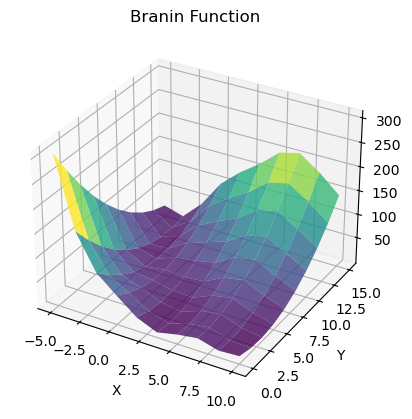

In [29]:
import matplotlib.pyplot as plt

# Create the grid of input values
x_range = np.linspace(-5, 10, 10)
y_range = np.linspace(0, 15, 10)
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Evaluate function on grid
z_grid = branin(x_grid, y_grid)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', alpha=0.8)

# Customize the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Branin Function')

# Show the plot
plt.show()

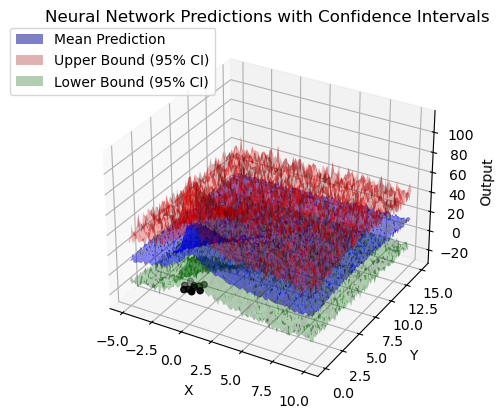

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import qmc  

x1_range = np.linspace(-5, 10, 100)
x2_range  = np.linspace(0, 15, 100)

x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
x_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]

# Perform MC Dropout predictions for entire meshgrid
pred_mean, pred_std = mc_dropout_predictions(best_model, x_grid)

# Locating global Maximum of predicted mean
max_index = np.argmax(pred_mean)
global_max_point = x_grid[max_index]

# Identify top 10 points with highest uncertainty
num_new_points = 10
lhs_sampler = qmc.LatinHypercube(d=2)  # LHS in a 2D space
lhs_sample = lhs_sampler.random(num_new_points)

# Scale LHS samples to region around global maximum
scaling_factor = 0.1  # Adjust this factor to control the sampling range
lhs_x1 = global_max_point[0] + scaling_factor * (x1_range.max() - x1_range.min()) * (lhs_sample[:, 0] - 0.5)
lhs_x2 = global_max_point[1] + scaling_factor * (x2_range.max() - x2_range.min()) * (lhs_sample[:, 1] - 0.5)

new_points = np.c_[lhs_x1, lhs_x2]

# Store new simualted points to validate and sample
new_points_df = pd.DataFrame(new_points, columns=['x', 'y'])

# Ploting mean predictions and confidence intervals
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Reshaping predictions back to grid shape
pred_mean_grid = pred_mean.reshape(x1_grid.shape)
pred_upper_grid = (pred_mean + 1.96 * pred_std).reshape(x1_grid.shape)
pred_lower_grid = (pred_mean - 1.96 * pred_std).reshape(x1_grid.shape)

mean_surface = ax.plot_surface(x1_grid, x2_grid, pred_mean_grid, color='blue', alpha=0.5, label='Mean Prediction')
upper_surface = ax.plot_surface(x1_grid, x2_grid, pred_upper_grid, color='red', alpha=0.3, label='Upper Bound (95% CI)')
lower_surface = ax.plot_surface(x1_grid, x2_grid, pred_lower_grid, color='green', alpha=0.3, label='Lower Bound (95% CI)')

# Plot the high uncertainty points
ax.scatter(new_points[:, 0], new_points[:, 1], color='black', marker='o', label='High Uncertainty Points')

# Customize the plot
ax.set_title('Neural Network Predictions with Confidence Intervals')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Output')

# Legend
legend_elements = [mean_surface, upper_surface, lower_surface]
fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

In [31]:
new_points_df

,x,y
0,0.221266,0.033604
1,0.497172,1.274839
2,-0.652313,0.511254
3,0.091479,0.611930
4,-0.153453,0.209086
5,0.312731,0.954265
6,-0.586017,1.166365
7,0.674049,0.452215
8,-0.054721,0.789845
9,-0.396249,-0.012520


In [32]:
# Add validated data points to original data frame
new_points_df["z1"] = branin(new_points_df['x'], new_points_df['y']) + ran_err(num_new_points, 0.05)

In [33]:
new_points_df

,x,y,z1
0,0.221266,0.033604,50.904500
1,0.497172,1.274839,34.079081
2,-0.652313,0.511254,61.049025
3,0.091479,0.611930,47.137107
4,-0.153453,0.209086,55.965361
5,0.312731,0.954265,39.880674
6,-0.586017,1.166365,51.835807
7,0.674049,0.452215,38.043505
8,-0.054721,0.789845,47.690836
9,-0.396249,-0.012520,63.262145


In [34]:
df = pd.concat([df, new_points_df], axis=0, ignore_index=True)
df

,x,y,z1
0,-2.499060,5.915850,26.013306
1,8.641057,8.101014,41.735086
2,9.385024,9.353607,48.180338
3,9.780517,8.949900,38.925937
4,5.676206,8.533312,72.721522
5,1.920923,11.249449,68.015359
6,3.819629,7.228961,31.934468
7,-1.389308,11.969082,24.043265
8,2.798120,4.222096,3.727618
9,2.016946,0.763008,12.371752


In [42]:
# Standardize the input points using the previously fitted scaler
test_points_scaled = scaler_x.transform(df[['x','y']])

# Make predictions with the trained model
predictions = best_model.predict(test_points_scaled)

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[12.539261 ]
 [32.513195 ]
 [36.75259  ]
 [33.46156  ]
 [56.212265 ]
 [54.442425 ]
 [27.685354 ]
 [27.286251 ]
 [ 9.565006 ]
 [ 4.465052 ]
 [ 4.0306616]
 [ 4.757264 ]
 [ 4.2621922]
 [ 4.332474 ]
 [ 4.1119537]
 [ 4.52239  ]
 [ 4.6385813]
 [ 4.2640734]
 [ 4.4227524]
 [ 3.9913306]]


In [ ]:
# Function to sample new data points based on uncertainty
def sample_new_points(model, X, n_samples=10):
    _, std = mc_dropout_predictions(model, X)
    high_uncertainty_indices = np.argsort(std)[-n_samples:]
    return high_uncertainty_indices

# Select new points to sample based on high uncertainty
new_points_indices = sample_new_points(best_model, X_scaled)
new_X = X_simulated[new_points_indices]
new_y = y_simulated[new_points_indices]
    
# Add new points to the training data
X_physical = np.concatenate([X_physical, new_X])
y_physical = np.concatenate([y_physical, new_y])



NameError: name 'X_simulated' is not defined

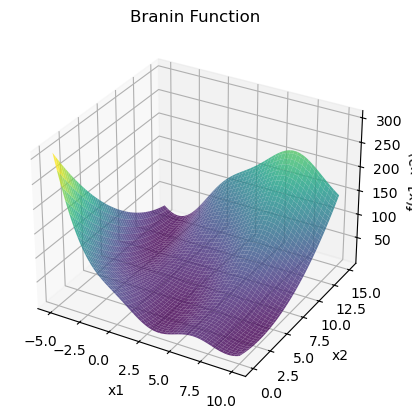

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Branin function
def branin(x, y):
    a = 1.0
    b = 5.1 / (4.0 * np.pi**2)
    c = 5.0 / np.pi
    r = 6.0
    s = 10.0
    t = 1.0 / (8.0 * np.pi)
    return a * (y - b * x**2 + c * x - r)**2 + s * (1 - t) * np.cos(x) + s

# Define the range for the input variables
x_range = np.linspace(-5, 10, 100)
y_range = np.linspace(0, 15, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Evaluate the Branin function on the grid
z_grid = branin(x_grid, y_grid)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface with wireframe
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', alpha=0.8)

# Customize the plot
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Branin Function')

# Show the plot
plt.show()

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import Problem
from pymoo.termination import get_termination
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SimulatedBinaryCrossover
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.optimize import minimize

# Define the objective functions based on the neural network outputs
# Problem is initialized with 2 decision vars and two objectives vars
class NNProblem(Problem):
    def __init__(self, model, scaler, maximize):
        super().__init__(n_var=2, n_obj=2, n_constr=0, xl=np.array([-15, 0]), xu=np.array([10, 15])) 
        self.model = model
        self.scaler = scaler
        self.maximize = maximize

    # Input data is scaled using a pre-fitted scaler
    # Predictions are made using NN model and stores them in an array
    def _evaluate(self, X, out, *args, **kwargs):
        X_scaled = self.scaler.transform(X)
        predictions = self.model.predict(X_scaled)
        # Adjust objectives based on whether they should be maximized or minimized
        for i in range(predictions.shape[1]):
            if self.maximize[i]:
                predictions[:, i] = -predictions[:, i]  # Convert maximization to minimization
        out["F"] = predictions

# Define the problem for NSGA-II (multi-objective evolutionary alorgirthm)
maximize = [False, False]
problem = NNProblem(best_model, scaler_x, maximize)

# Defining the NSGA-II algorithm
algorithm = NSGA2(
    pop_size=10, # Outputs 10 pareto optimal points
    sampling=FloatRandomSampling(),
    crossover=SimulatedBinaryCrossover(prob=0.9, eta=15),
    mutation=PolynomialMutation(eta=20), 
    eliminate_duplicates=True # Ensures duplicate solutions are disregarded
)

# Perform optimization
termination = get_termination("n_gen", 100) # Sets the termination criterion to stop after 100 generations
res = minimize(problem, algorithm, termination, seed=1, save_history=True, verbose=True)

# Extract Pareto-optimal solutions
pareto_set = res.X
pareto_front = res.F

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\Simon\anaconda3\envs\research\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Exception: ('Problem Error: F can not be set, expected shape (10, 2) but provided (10, 1)', ValueError('cannot reshape array of size 10 into shape (10,2)'))

In [ ]:
# Displaying results
print("Pareto-optimal solutions (inputs):")
print(pareto_set)
print("Pareto-optimal solutions (outputs):")
print(pareto_front)

# Choose the next samples based on Pareto-optimal solutions
next_samples = pd.DataFrame(pareto_set, columns=['x', 'y'])
next_samples["z1"] = pareto_front[:, 0]
next_samples["z2"] = pareto_front[:, 1]

Pareto-optimal solutions (inputs):
[[ 2.79164722e-01  5.32437199e+00]
 [-1.50000000e+01  1.18419280e-06]
 [-1.50000000e+01  1.18419280e-06]
 [-6.25177374e+00  5.83702385e+00]
 [-9.61064196e+00  4.72847610e+00]
 [-1.47149772e+01  4.79900880e+00]
 [-1.47149772e+01  7.95091401e-01]
 [-1.28654767e+01  5.31296874e+00]
 [-6.25177374e+00  2.90713093e-01]
 [-7.77692202e-01  1.18419280e-06]]
Pareto-optimal solutions (outputs):
[[  7.74339437   0.40654179]
 [371.50640869 -49.78916168]
 [371.50640869 -49.78916168]
 [ 91.50109863 -11.16776657]
 [178.09199524 -23.04954147]
 [279.28240967 -36.72463989]
 [351.58129883 -46.99617767]
 [232.94233704 -30.39001083]
 [187.75794983 -24.90224457]
 [ 44.49414062  -5.25044012]]


In [ ]:
print("Next samples to evaluate:")
print(next_samples)

Next samples to evaluate:
           x         y          z1         z2
0   0.279165  5.324372    7.743394   0.406542
1 -15.000000  0.000001  371.506409 -49.789162
2 -15.000000  0.000001  371.506409 -49.789162
3  -6.251774  5.837024   91.501099 -11.167767
4  -9.610642  4.728476  178.091995 -23.049541
5 -14.714977  4.799009  279.282410 -36.724640
6 -14.714977  0.795091  351.581299 -46.996178
7 -12.865477  5.312969  232.942337 -30.390011
8  -6.251774  0.290713  187.757950 -24.902245
9  -0.777692  0.000001   44.494141  -5.250440


In [ ]:
# Extract x and y columns from next_samples DataFrame
X_new = next_samples[['x', 'y']].values

Y_new = next_samples[['z1', 'z2']].values

# Scale the extracted data
X_new_scaled = scaler_x.transform(X_new)


c:\Users\Simon\anaconda3\envs\research\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
actual_values = branin(next_samples['x'], next_samples['y'])
actual_values2 = currin(next_samples['x'], next_samples['y'])

validated_values = pd.DataFrame(actual_values, columns=['z1'])
validated_values["z2"] = actual_values2

validated_values = pd.concat([next_samples[['x', 'y']], validated_values], axis=1)
validated_values

,x,y,z1,z2
0,0.279165,5.324372,19.288646,1.212398
1,-15.000000,0.000001,3476.600070,32.733381
2,-15.000000,0.000001,3476.600066,32.733381
3,-6.251774,5.837024,249.487187,8.393886
4,-9.610642,4.728476,812.778515,4.442503
5,-14.714977,4.799009,2770.778857,3.267299
6,-14.714977,0.795091,3207.966251,15.414481
7,-12.865477,5.312969,1829.317196,3.179779
8,-6.251774,0.290713,448.436383,83.936745
9,-0.777692,0.000001,70.363731,-5.508085


In [ ]:
loss = best_model.evaluate(X_new_scaled, validated_values[['z1', 'z2']])

loss_values = []

# Store the loss value in the list
loss_values.append(loss)

# Convert the list to a DataFrame
loss_df = pd.DataFrame(loss_values, columns=['loss'])

# Print the DataFrame
print("Loss values stored in a DataFrame:")
print(loss_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1836400.7500
Loss values stored in a DataFrame:
         loss
0  1836400.75
